In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/sett/Desktop/Electric_Vehicle_Population_Data.csv')

In [3]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


In [4]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [5]:
data.info

<bound method DataFrame.info of         VIN (1-10)    County            City State  Postal Code  Model Year  \
0       WAUTPBFF4H      King         Seattle    WA      98126.0        2017   
1       WAUUPBFF2J  Thurston         Olympia    WA      98502.0        2018   
2       5YJSA1E22H  Thurston           Lacey    WA      98516.0        2017   
3       1C4JJXP62M  Thurston          Tenino    WA      98589.0        2021   
4       5YJ3E1EC9L    Yakima          Yakima    WA      98902.0        2020   
...            ...       ...             ...   ...          ...         ...   
181453  50EA1TEA7P   Douglas  East Wenatchee    WA      98802.0        2023   
181454  1C4JJXP60N   Spokane  Spokane Valley    WA      99206.0        2022   
181455  5YJ3E1EA0M      King        Enumclaw    WA      98022.0        2021   
181456  5YJ3E1EC8L     Clark       Vancouver    WA      98682.0        2020   
181457  5YJSA1E27F   Whatcom      Bellingham    WA      98225.0        2015   

         Make     M

In [6]:
null_percentages = data.isnull().mean() * 100
null_percentages

VIN (1-10)                                           0.000000
County                                               0.001653
City                                                 0.001653
State                                                0.000000
Postal Code                                          0.001653
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.219335
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.004409
Electric Utility                                     0.001653
2020 Cen

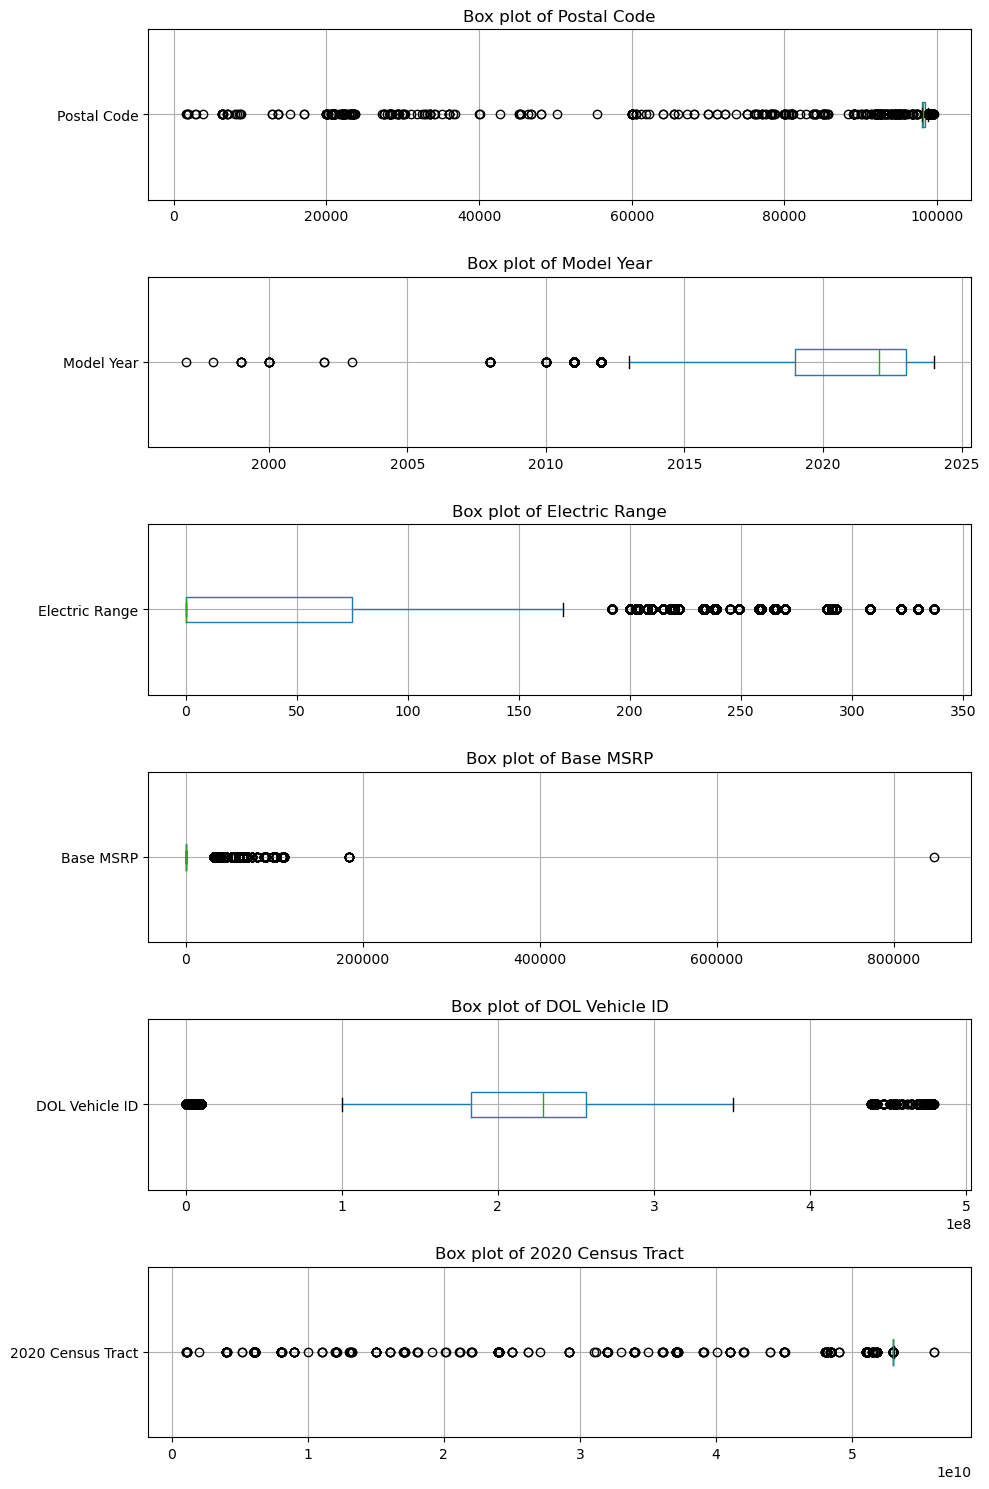

In [7]:
column_to_drop = null_percentages.idxmax()

# Dropping the column
data_cleaned = data.drop(columns=[column_to_drop])

# Create a box plot of the numerical columns in the remaining data to identify outliers
import matplotlib.pyplot as plt

numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
fig, ax = plt.subplots(len(numerical_columns), 1, figsize=(10, 15))

for i, col in enumerate(numerical_columns):
    data_cleaned.boxplot(column=col, ax=ax[i], vert=False)
    ax[i].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

In [8]:
# Step 6: Separate categorical and numerical columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

categorical_columns, numerical_columns


(Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
        'Electric Vehicle Type',
        'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
        'Electric Utility'],
       dtype='object'),
 Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
        'DOL Vehicle ID', '2020 Census Tract'],
       dtype='object'))

In [9]:
descriptive_statistics = data_cleaned[numerical_columns].describe()
descriptive_statistics

,Postal Code,Model Year,Electric Range,Base MSRP,DOL Vehicle ID,2020 Census Tract
count,181455.000000,181458.000000,181458.000000,181458.000000,1.814580e+05,1.814550e+05
mean,98174.050718,2020.581793,57.826665,1040.236749,2.214128e+08,5.297575e+10
std,2414.241968,2.991140,91.396074,8228.989085,7.528561e+07,1.594876e+09
min,1545.000000,1997.000000,0.000000,0.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,1.830687e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,2.289155e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,2.561320e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,4.792548e+08,5.603300e+10


In [10]:
from sklearn.preprocessing import LabelEncoder

# Step 8: Apply label encoding technique to the categorical columns
label_encoders = {}
encoded_data = data_cleaned.copy()

for column in categorical_columns:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(data_cleaned[column].astype(str))
    label_encoders[column] = le

# Show the first few rows of the encoded data to verify
encoded_data.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,8402,79,572,42,98126.0,2017,1,8,1,2,16,0,235085336,469,57,5.303301e+10
1,8430,172,448,42,98502.0,2018,1,8,1,2,16,0,237896795,616,73,5.306701e+10
2,3623,172,305,42,98516.0,2017,34,82,0,0,210,0,154498865,590,73,5.306701e+10
3,17,172,638,42,98589.0,2021,17,136,1,2,25,0,154525493,598,73,5.306701e+10
4,3406,189,721,42,98902.0,2020,34,81,0,0,308,0,225996361,262,65,5.307700e+10


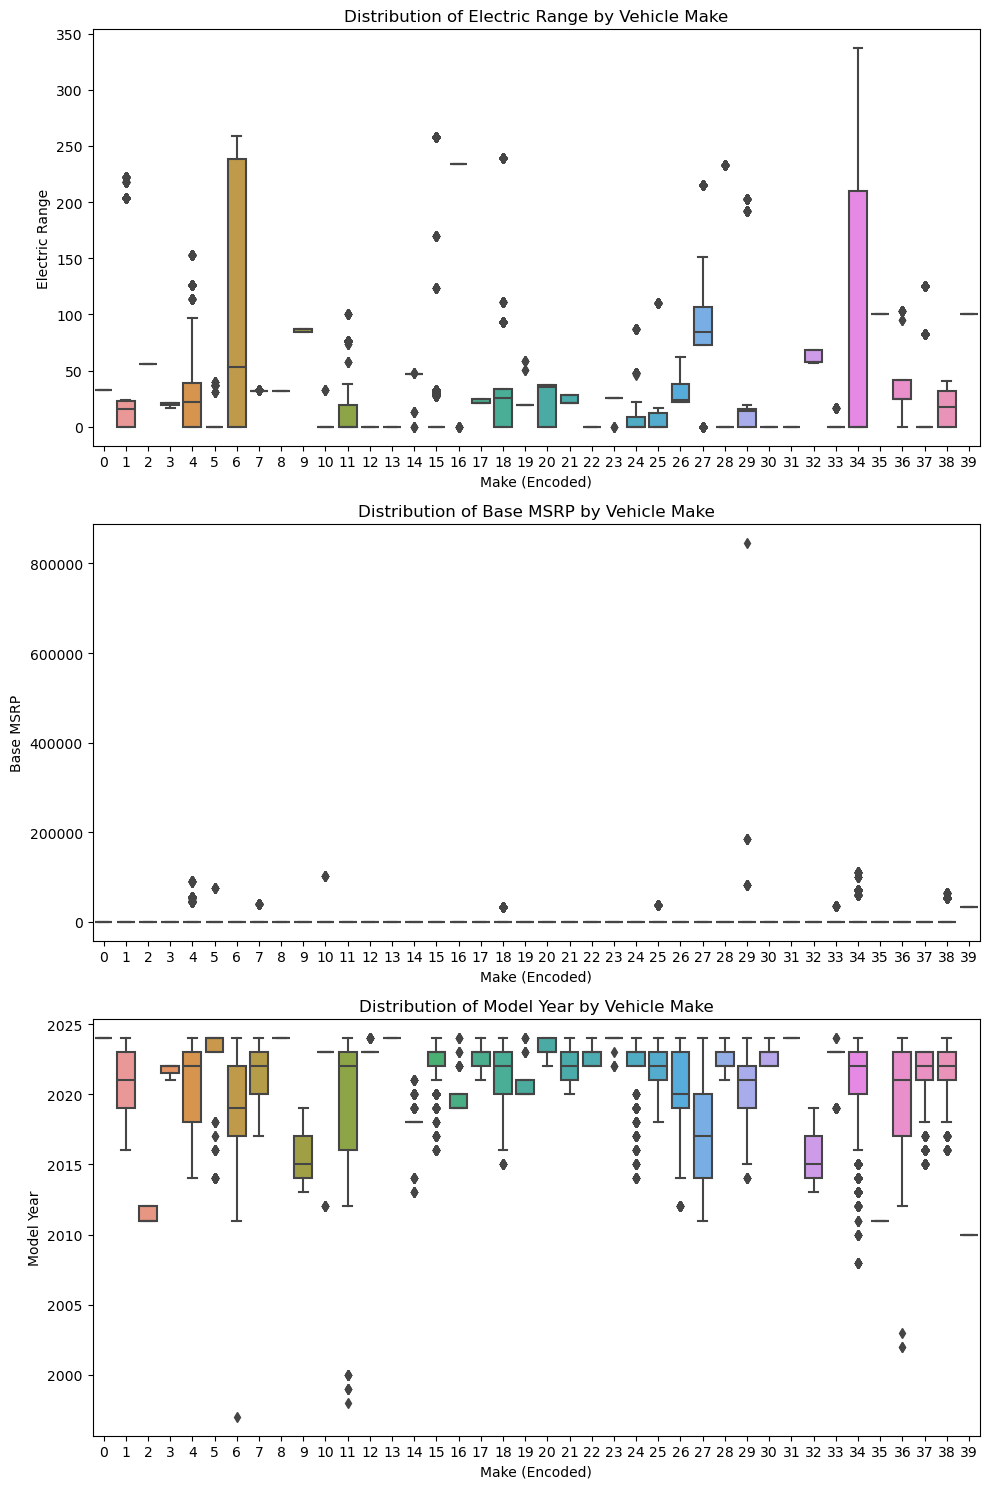

In [11]:
import seaborn as sns

# Step 8: Visualize the data by using subplots (one categorical column with other numerical columns)
# Choosing 'Make' as the categorical column and visualizing it against some numerical columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
numerical_features_to_plot = ['Electric Range', 'Base MSRP', 'Model Year']

for i, num_col in enumerate(numerical_features_to_plot):
    sns.boxplot(ax=axes[i], x=encoded_data['Make'], y=encoded_data[num_col])
    axes[i].set_title(f'Distribution of {num_col} by Vehicle Make')
    axes[i].set_xlabel('Make (Encoded)')
    axes[i].set_ylabel(num_col)

plt.tight_layout()
plt.show()


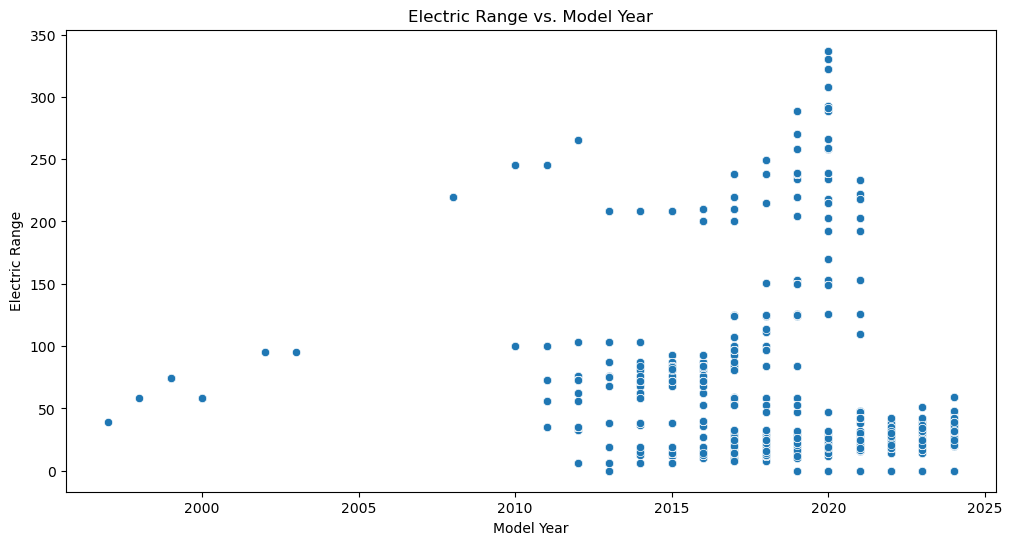

In [12]:
# Step 9: Visualize the data using Seaborn graphs for the columns 'Electric Range' and 'Model Year'
plt.figure(figsize=(12, 6))
sns.scatterplot(x=encoded_data['Model Year'], y=encoded_data['Electric Range'])
plt.title('Electric Range vs. Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.show()


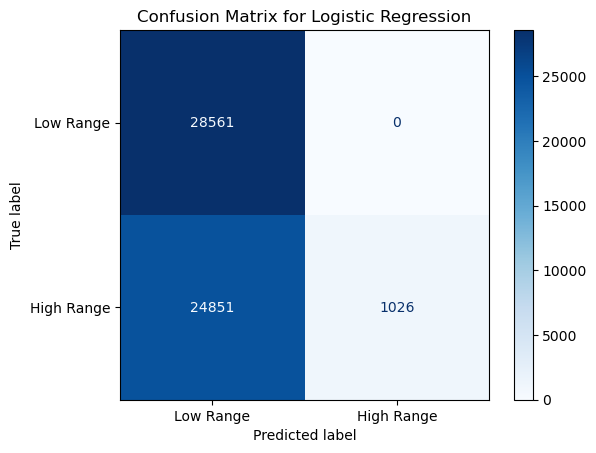

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

# Replotting the confusion matrix using the updated method
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', display_labels=['Low Range', 'High Range'])
plt.title('Confusion Matrix for Logistic Regression')
plt.grid(False)
plt.show()


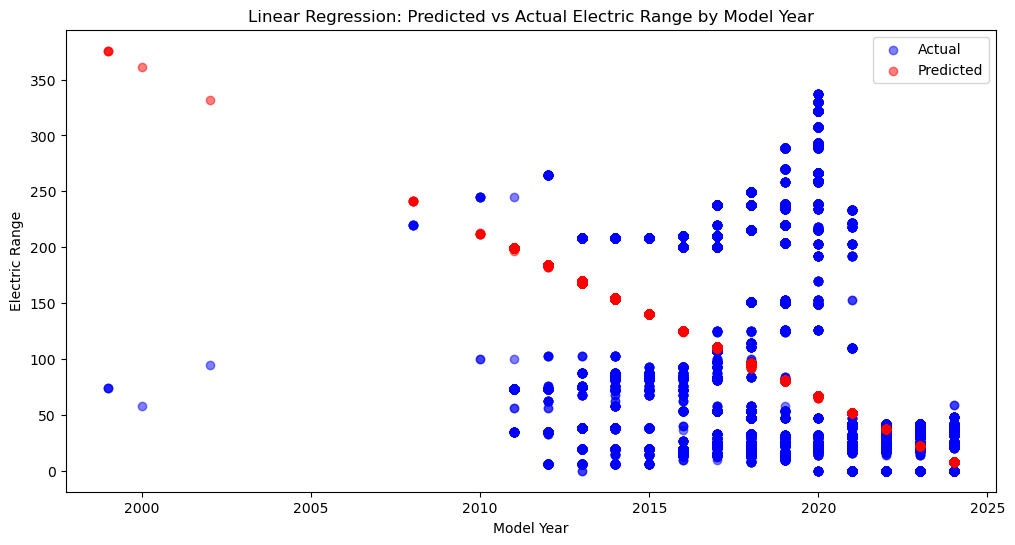

(array([-1.47278413e+01, -2.05664158e-05]), 29816.7712762019)

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 11: Regression analysis of the variables
# We'll perform a linear regression where 'Electric Range' is the dependent variable,
# and we'll consider 'Model Year' and 'Base MSRP' as independent variables.

# Preparing the data for regression
X = encoded_data[['Model Year', 'Base MSRP']]  # Independent variables
y = encoded_data['Electric Range']             # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicting the test data
y_pred = lin_reg.predict(X_test)

# Plotting the regression results
plt.figure(figsize=(12, 6))
plt.scatter(X_test['Model Year'], y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test['Model Year'], y_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Linear Regression: Predicted vs Actual Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.legend()
plt.show()

# Outputting coefficients
lin_reg.coef_, lin_reg.intercept_


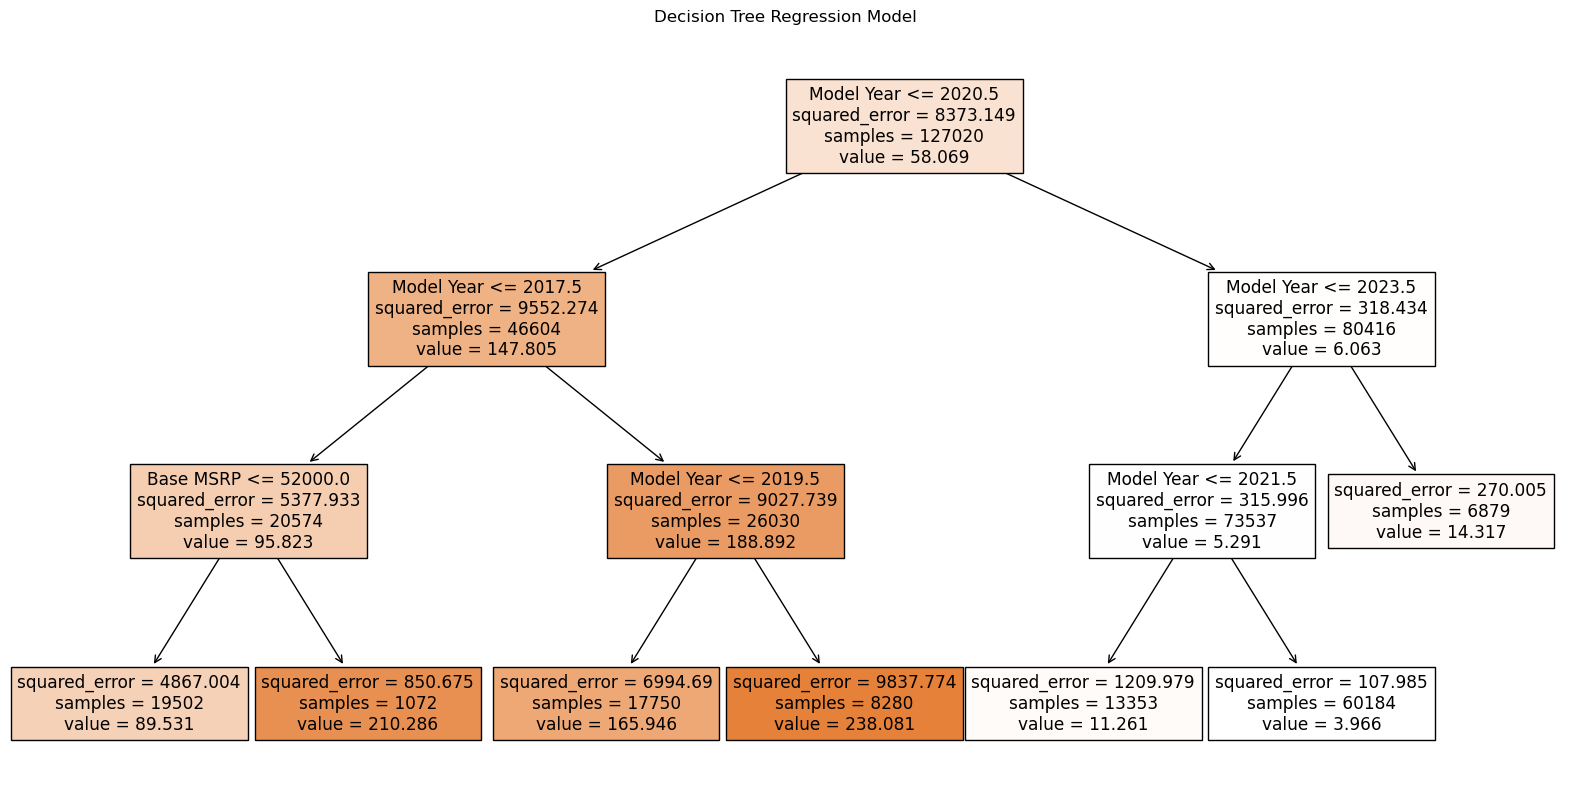

In [19]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Step 12: Create a decision tree of the data and interpret
# We'll use the same features and target as in the linear regression model

# Creating the decision tree model
decision_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree, feature_names=X_train.columns, filled=True)
plt.title('Decision Tree Regression Model')
plt.show()


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


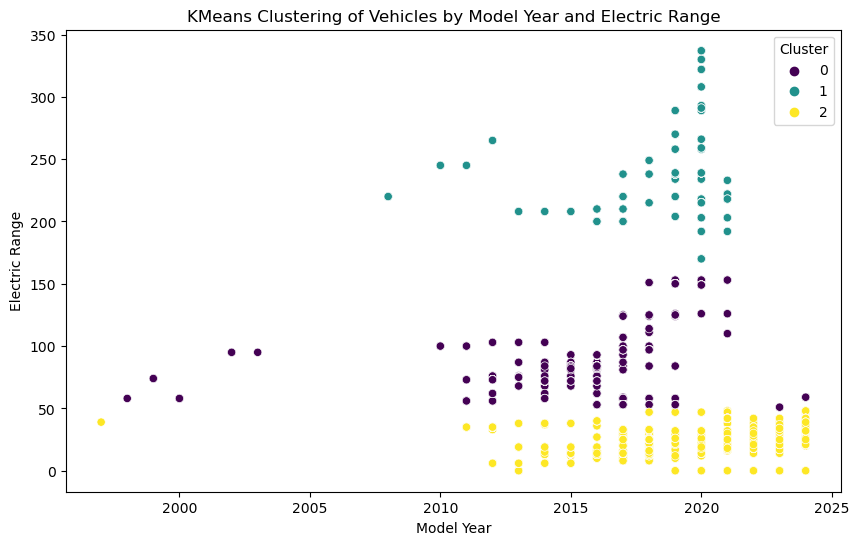

In [20]:
from sklearn.cluster import KMeans
import seaborn as sns

# Step 13: Use one clustering Technique with Graph and interpretation
# We will use KMeans clustering to cluster the data based on 'Model Year' and 'Electric Range'

# Preparing data for clustering
X_clustering = encoded_data[['Model Year', 'Electric Range']]

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_clustering)
clusters = kmeans.labels_

# Adding cluster information to the DataFrame for visualization
encoded_data['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model Year', y='Electric Range', hue='Cluster', data=encoded_data, palette='viridis')
plt.title('KMeans Clustering of Vehicles by Model Year and Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.legend(title='Cluster')
plt.show()


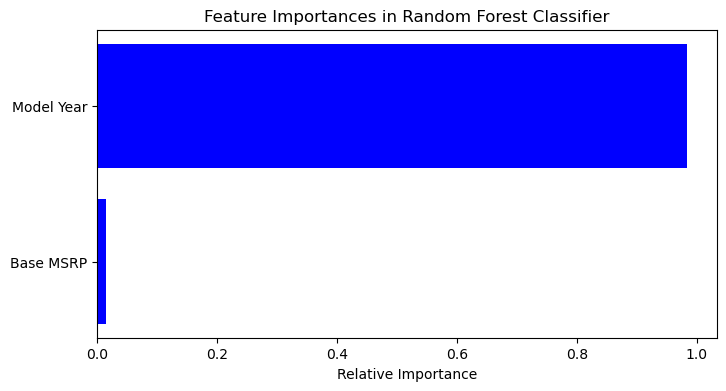

'              precision    recall  f1-score   support\n\n           0       0.82      1.00      0.90     28561\n           1       1.00      0.76      0.86     25877\n\n    accuracy                           0.89     54438\n   macro avg       0.91      0.88      0.88     54438\nweighted avg       0.91      0.89      0.88     54438\n'

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 14: Use one Classification Technique with Graph and Interpretation
# We'll use the RandomForestClassifier to predict the 'High Electric Range' based on 'Model Year' and 'Base MSRP'

# Preparing data for classification
X = encoded_data[['Model Year', 'Base MSRP']]
y = encoded_data['High Electric Range']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predicting the test data
y_pred = random_forest.predict(X_test)

# Classification report
classification_results = classification_report(y_test, y_pred)

# Plotting feature importance
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 4))
plt.title('Feature Importances in Random Forest Classifier')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

classification_results
